In [14]:
import math
import matplotlib.pyplot as plt

In [15]:
class Gaussian():
    """ Guassian distribution class for calculating 
    and visualizing a Gaussian distribution
    
    Attributtes:
        mean (float) the mean value
        stdev (float) the standard deviation
        data_list (list of floats) a list of floats extracted from the data file
    """
    
    def __init__(self, mu = 0, sigma = 1 ):
        
        self.mean = mu
        self.stdev = sigma
        self.data = []
        
    def calculate_mean(self):
        """ Function to calculate the mean of the data set.
        
        Args:
            None
            
        Returns:
            float: mean of the data set    
        """
        
        avg = 1.0*sum(self.data)/len(self.data)
        self.mean = avg
        
        return self.mean
    
    
    def calculate_stdev(self, sample=True):
        """ Function to calculate he standard deviation of the data set.
        
        Args:
            sample (bool): whether the data represents a sample or pupulation
            
        Returns: 
            float: standard deviation of the data set
        """
        
        if sample: 
            n = len(self.data)-1
        else:
            n = len(self.data)
            
        mean = self.mean
        sigma = 0
        
        for d in self.data:
            sigma += (d-mean)**2
            
        sigma = math.sqrt(sigma/n)
        self.stdev = sigma
        
        return self.stdev
    
    
    def read_data_file(self, file_name, sample = True):
        """ Function to read in data from a txt file. The txt file should have
        one number per line. The number are stored in the data attribute. 

        Args:
            file_name (string): name of a file to read from

        Returns: 
            None    
        """
        
        with open(file_name) as file:
            data_list = []
            line = file.readline()
            while line:
                data_list.append(int(line))
                line = file.readline()
        file.close()
        
        self.data = data_list
        self.mean = self.calculate_mean()
        self.stdev = self.calculate_stdev(sample)
        
        
    def plot_histogram(self):
        """ Function to output a histogram of the instance variable data.
        using matplotlib.
        
        Args:
            None
                
        Returns:
            None
        """
        
        plt.hist(self.data)
        plt.title('Histogram of Data')
        plt.xlabel('data')
        plt.ylabel('count')
        
        
    def pdf(self,x):
        """ Probability density function calculator for the gaussian distribution.
            
        Args: 
            x (float): point for calculating the probability density function
                
        Returns:
            float: probabilty density function output
        """
        
        return (1.0 / (self.stdev*math.sqrt(2*math.pi))) * math.exp(-0.5*((x-self.mean)/self.stdev)**2)
    
    def plot_histogram_pdf(self, n_spaces = 50):
        """ Function to plot the normalized histogram of the data and a plot of 
        the probability density function along the same range.
        
        Args:
            n_spaces (int): number of data points
            
        Returns:
            list: x values for the pdf plot
            list: y values for the pdf plot
        """
        
        mu = self.mean
        sigma = self.stdev
        
        min_range = min(self.data)
        max_range = max(self.data)
        
        # calculates the interval between x values 
        interval = 1.0*(max_range-min_range)/n_spaces
        x = []
        y = []
        
        # calculates the x values to visualize
        for i in range(n_spaces):
            tmp = min_range + interval*i
            x.append(tmp)
            y.append(self.pdf(tmp))
            
        # makes the plots
        fig, axes = plt.subplots(1,2,figsize=(13,4.5))
        fig.subplots_adjust(hspace=.5)
        axes[0].hist(self.data, density = True)
        axes[0].set_title('Normed Histogram of Data')
        axes[0].set_ylabel('Density')
        
        axes[1].plot(x,y)
        axes[1].set_title('Normal Distribution for \n Sample Mean and Sample Standard Deviation')
        axes[1].set_ylabel('Density')
        plt.show()
        
        return x, y
        
    def __add__(self, other):
        """ Function to add together two Guassian distributions.
        
        Args:
            other (Gaussian): Gaussian instance
            
        Returns:
            Gaussian: Gaussian distribution
        """
        
        result = Gaussian()
        result.mean = self.mean + other.mean
        result.stdev = math.sqrt(self.stdev**2 + other.stdev**2)
        
        return result
        
    def __repr__(self):
        """ Function to output the characteristics of the Gaussian instance. 
        
        Args:
            None
            
        Returns:
            string: characteristics of the Gaussian
        """
        
        return "mean: {}, standard deviation: {}".format(self.mean, self. stdev)
        

In [16]:
gaussian_one = Gaussian()
gaussian_one.read_data_file('numbers.txt')

In [17]:
gaussian_one

mean: 78.0909090909091, standard deviation: 92.87459776004906

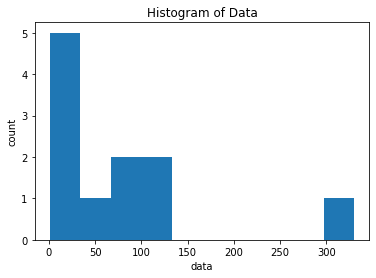

In [18]:
gaussian_one.plot_histogram()

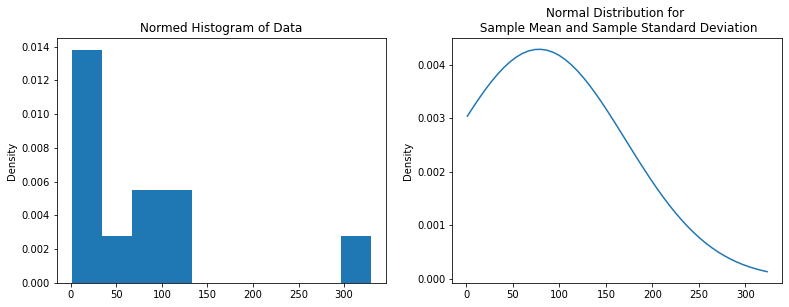

([1.0,
  7.58,
  14.16,
  20.740000000000002,
  27.32,
  33.9,
  40.480000000000004,
  47.06,
  53.64,
  60.22,
  66.8,
  73.38,
  79.96000000000001,
  86.54,
  93.12,
  99.7,
  106.28,
  112.86,
  119.44,
  126.02,
  132.6,
  139.18,
  145.76,
  152.34,
  158.92000000000002,
  165.5,
  172.08,
  178.66,
  185.24,
  191.82,
  198.4,
  204.98,
  211.56,
  218.14000000000001,
  224.72,
  231.3,
  237.88,
  244.46,
  251.04,
  257.62,
  264.2,
  270.78000000000003,
  277.36,
  283.94,
  290.52,
  297.1,
  303.68,
  310.26,
  316.84000000000003,
  323.42],
 [0.0030436941280150395,
  0.0032199635775976665,
  0.003389385629106679,
  0.0035498588092989685,
  0.0036993144412822716,
  0.0038357605437130374,
  0.003957325730527453,
  0.004062301768846044,
  0.004149183447609647,
  0.004216704458941581,
  0.004263868097796145,
  0.004289971740008139,
  0.004294624258609417,
  0.004277755775037969,
  0.0042396194054553134,
  0.004180784941175556,
  0.004102124683731816,
  0.004004791926750454,
  0

In [19]:
gaussian_one.plot_histogram_pdf()

In [20]:
gaussian_one = Gaussian(5,3)
gaussian_two = Gaussian(10,4)

gaussian_sum = gaussian_one + gaussian_two

gaussian_sum

mean: 15, standard deviation: 5.0